### Group 13 Contributions: Shenghua (Isaac) Zhu, Truell Clark, Anish Ravilla

All three of us helped write the data acquisition and preparation, with Isaac leading us in this process with guidance and advice. Isaac helped create the box plots, the correlation heatmap, and the feature selection chart, along with the implementation of a Random Forest Classifier. Isaac also programmed the decision boundary function. Anish helped create the groupby chart, the hisograms of the physical features for each penguin species, the function to visualize confusion matrices, and the implementation of a Logistic Regression model with its respective confunsion matrix and decision boundary plot. Truell contributed the majority of the written explanations for the explanatory data analysis and the implementation of the K-Nearest machine learning model, along with its respective confusion matrix and decision boundary plot.

### Project: How can we use Machine Learning Models to Predict the Species of a Penguin?


For this project, our goal is to determine which variables are the most predictive of a penguin's species. We are using the Palmer Penguins data set, which was collected by Dr. Kristen Gorman. To efficiently and concisely build a model that can accomplish our task, we download the following libraries. Matplotlib and seaborn are used for the display of our data, while the rest of the libraries help clean, process, and examine the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

## Data Import and Cleaning

Next, we store the Palmer Penguins data under an easy-to-access variable called penguins and look at the structure of our data.

In [5]:
import ssl#my computer is weird and only imports files given this command delete before turning in
ssl._create_default_https_context = ssl._create_unverified_context #my computer is weird and only imports files given this command delete before turning in
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)
print(penguins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

We ran a df.unique() method for the certain variables to make sure that there was variation between the variables for us to analyze. For instance, if there was only one unique value, such as for the "Region" variable, we removed it from our model. In our search for variables that are predictive of species, variables that are the same for each penguin will not be helpful.

In [6]:
X = penguins[['Island','Culmen Length (mm)','Clutch Completion','Culmen Depth (mm)',
              'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
y = penguins['Species']

In [11]:
#Split data into traning and testing data (70% training, 30% testing) and look at their shapes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 9), (104, 9), (240,), (104,))

Then we check for NA values in our training and testing sets

In [ ]:
X_train.isna().sum()

Island                  0
Culmen Length (mm)      1
Clutch Completion       0
Culmen Depth (mm)       1
Flipper Length (mm)     1
Body Mass (g)           1
Sex                     8
Delta 15 N (o/oo)      11
Delta 13 C (o/oo)      10
dtype: int64

In [ ]:
X_test.isna().sum()

Island                 0
Culmen Length (mm)     1
Clutch Completion      0
Culmen Depth (mm)      1
Flipper Length (mm)    1
Body Mass (g)          1
Sex                    2
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
dtype: int64

In [ ]:
y_train.isna().sum()

0

In [ ]:
y_test.isna().sum()

0

Create data preprocessing pipelines for cleaning and labeling.

In [ ]:
def clean(df):
    df = df.dropna()
    df = df[df['Sex']!='.']
    return df

def label(df):
    df = pd.DataFrame(df)
    le = preprocessing.LabelEncoder()
    df = df.apply(le.fit_transform)
    return df

In [ ]:
X = label(X)
y = label(y)
X_train = label(clean(X_train))
X_test = label(clean(X_test))
y_train = label(y_train)
y_test = label(y_test)
#check x_train
X_train.head()

,Island,Culmen Length (mm),Clutch Completion,Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
31,1,19,1,47,3,33,1,216,175
245,0,81,1,18,37,64,1,10,140
277,0,75,1,17,42,62,1,111,18
165,1,126,1,47,25,36,1,154,214
126,2,31,1,42,15,10,0,139,109


After data cleaning and labeling, we can see that X_train and X_test is free of NA values and all the categorical variables are encoded as integer values. We mark the indices of penguins that we dropped from X_train and X_test and drop the corresponding species in y_train and y_test to make sure that our training and testing sets match in size.  

In [ ]:

new_train_index = [index for index in X_train.index if index in y_train.index]
y_train = y_train.loc[new_train_index]
new_test_index = [index for index in X_test.index if index in y_test.index]
y_test = y_test.loc[new_test_index]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((225, 9), (99, 9), (225, 1), (99, 1))

## Exploratory Data Analysis

We first check the distrbution of the penguins species

In [ ]:
penguins["Species"].value_counts(normalize=True)
#0: Adelie Penguin
#1: Chinstrap penguin
#2: Gentoo penguin

Adelie Penguin (Pygoscelis adeliae)          0.441860
Gentoo penguin (Pygoscelis papua)            0.360465
Chinstrap penguin (Pygoscelis antarctica)    0.197674
Name: Species, dtype: float64

Based on the penguins data, we have 44.2% of Adelie Penguin, 36.0% of Chinstrap Penguin, and 19.8% of Gentoo Penguin.

In [ ]:
#We combine the training and testing data to 
#produce a clean penguins dataframe for producing meaningful analysis
train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)
new_penguins = pd.concat([train,test],axis=0)

One of the first steps we take in our exploratory analysis is to create a correlation heatmap. The grid below displays the correlation between all variables in our dataframe. Positive values indicate a positive relationship between two variables, with 1 being a perfect positive relationship, and negative values indicating a negative relationship. A value of 0 is interpreted as there being no correlation between two variables. For modeling purposes, we focus on variables that have correlations with species that are of large magnitude. A strong positive or negative correlation shows that variables may be useful in predicting each other.

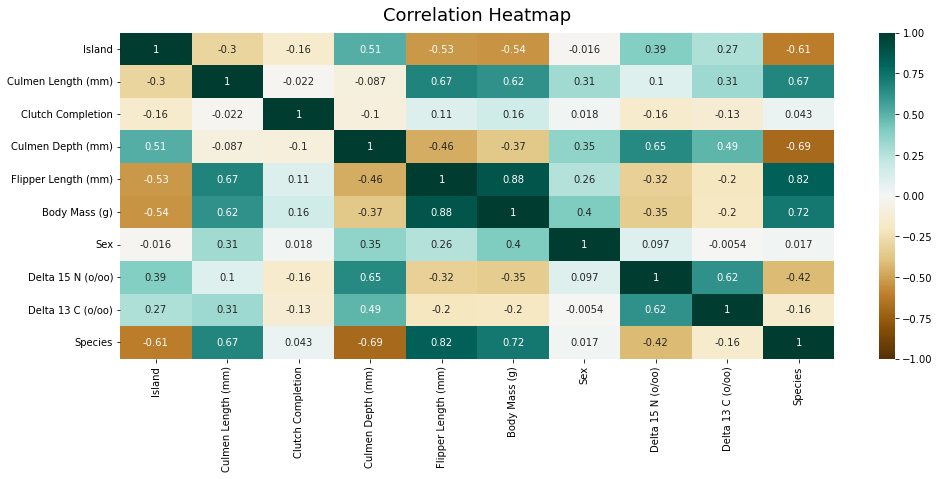

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(new_penguins.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

As stated above, we are interested in variables that have high a correlation with the Species variable. These include *Culmen Length, Flipper Length, Body Mass, and Island*. From these variables we are going to choose **2 features** and **1 qualitative feature**. In the next section, we'll explore the distribution of these significant variables to see if they can be included in our model.

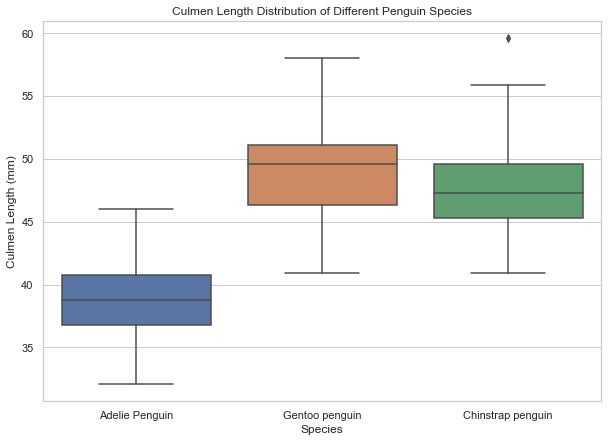

In [ ]:
fig = plt.figure(figsize =(10, 7))
sns.set_theme(style="whitegrid")
sns.boxplot(x="Species", y="Culmen Length (mm)", data= penguins)
plt.xticks([0, 1, 2], ['Adelie Penguin', 'Gentoo penguin', 'Chinstrap penguin'])
plt.title('Culmen Length Distribution of Different Penguin Species')
plt.show()

Here, we created a figure that displays a boxplot for the Culmen Length distribution for each species. From the figure, we see that the Adelie penguins have comparatively shorter Culmen Lengths, as 50% of the data lie between approximately 36 and 41mm. Chinstrap and Gentoo penguins have much more similar distributions, as 50% of the data of both penguins lie between approximately 45 and 51mm. We also see that nearly all penguins with Culmen Length less than 41mm are Adelie penguins, and that approximately 75% of Adelie penguins have Culmen Lengths less than 41mm. From this we assume that Culmen Length will be very helpful in identifying the majority of Adelie penguins, but not very helpful in distinguishing Gentoo penguins from Chinstrap.

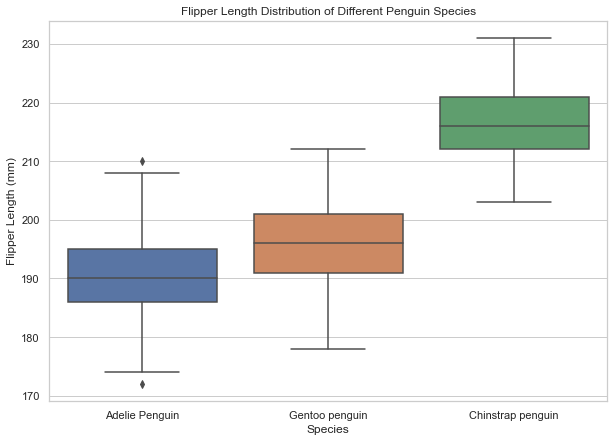

In [ ]:
fig = plt.figure(figsize =(10, 7))
sns.set_theme(style="whitegrid")
sns.boxplot(x="Species", y="Flipper Length (mm)", data= penguins)
plt.xticks([0, 1, 2], ['Adelie Penguin', 'Gentoo penguin', 'Chinstrap penguin'])
plt.title('Flipper Length Distribution of Different Penguin Species')
plt.show()

Additionally, we created a boxplot figure for the Flipper Length distribution for each species. From the plot, we observe that Chinstrap penguins have much longer Flipper Lengths than both Gentoo and Adelie penguins. The median Flipper Length for the Chinstrap penguins is approximately 216mm, while the medians of Gentoo and Adelie penguins are approximately 190 and 196mm. Furthermore, 75% of Chinstrap penguins have Flipper Lengths greater than 212mm, and that there is not a single Gentoo and Adelie penguin with Flipper Lengths longer than this. Flipper Length is very helpful in distinguishing Chinstrap penguins from the other two species, but will not be as useful for differentiating Gentoo penguins from Adelie.

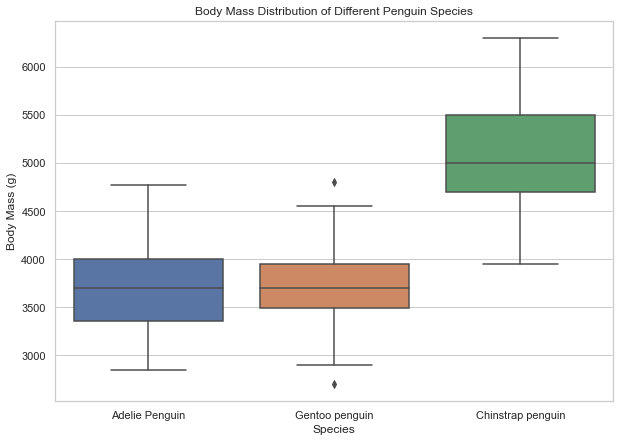

In [ ]:
fig = plt.figure(figsize =(10, 7))
sns.set_theme(style="whitegrid")
sns.boxplot(x="Species", y="Body Mass (g)", data= penguins)
plt.xticks([0, 1, 2], ['Adelie Penguin', 'Gentoo penguin', 'Chinstrap penguin'])
plt.title('Body Mass Distribution of Different Penguin Species')
plt.show()

Above, our final box plot displays the Body Mass distribution for each species. Here, we see that the distribution for the Chinstrap penguins once again sticks out amongst the others. The median Body Mass for a Chinstrap penguin is approximately 5000g, while Adelie and Gentoo penguins have very similar medians that are both approximately 3700g. At least 50% of Chinstrap penguins have body mass greater than 4900g, and neither the Adelie nor the Gentoo penguin groups contain a penguin with Body Mass this large. Similar to Flipper Length, Body Mass greatly helps to distinguish Chinstrap penguins for the other two species, but does not help to distinguish Gentoo and Adelie penguins from each other.

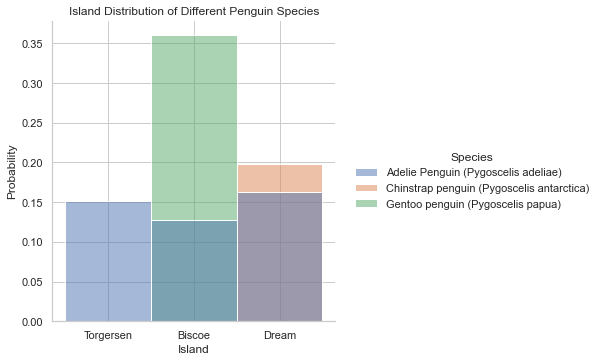

In [ ]:
sns.set_theme(style="whitegrid")
sns.displot(penguins, x='Island', hue = 'Species', stat = 'probability')
plt.title('Island Distribution of Different Penguin Species')
plt.show()

Above is a stacked bar plot of the island distribution of different penguin species. Adelie penguins are the only species present on all three islands, while chinstrap penguins and gentoo penguins are on Biscoe and Dream island respectively. Approximately 35% of Biscoe Island consists of Gentoo penguins, the highest proportion of a single penguin species out of any island. 

Below is a table display of some summary statistics of the variables that we wish to analyze as predictor variables. We chose the variables of Culmen Length, Flipper Length, and Body Mass, as these are the variables with the highest correlations with Species, as seen in the heat map above. We breakdown the variables by species and calculate the mean, standard deviation, minimum, and maximum for each variable based on the species. In the species column, 0 corresponds with Adelie, 1 corresponds with Chinstrap, and 2 corresponds with Gentoo. In the island column, 0 corresponds with Dream, 1 corresponds with Biscoe, and 2 corresponds with Torgersen.


In [ ]:
#Variables we wish to analyze as possible predictor variables
cols = ['Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)' ]

train.groupby(["Species", "Island"])[cols].aggregate([np.mean, np.std, np.min, np.max])

Culmen Length (mm)                      Flipper Length (mm)  \
                             mean        std amin amax                mean   
Species Island                                                               
0       0               31.033333  16.325321    4   76           11.700000   
        1               28.815789  16.531469    0   66           13.789474   
        2               30.200000  18.823744    2   66           16.960000   
1       1              102.468085  24.583355   44  136           20.042553   
2       0               90.317647  21.879111   44  137           38.941176   

                                   Body Mass (g)                       
                     std amin amax          mean        std amin amax  
Species Island                                                         
0       0       5.995113    0   24     24.033333  14.074882    1   51  
        1       6.485568    3   30     24.342105  14.226500    2   47  
        2       6.483826    2   32     24.480000  14.350145    4   53  
1       1       6.733942    5   34     26.638298  12.656714    0   56  
2       0       5.780412   29   51     61.211765  10.017953   39   79

In order to gain a sense of what the distributions for these high correlation variables look like, we created a histogram that distinguishes between each species for each of these variables, with the use of the groupby and apply functions. 

""


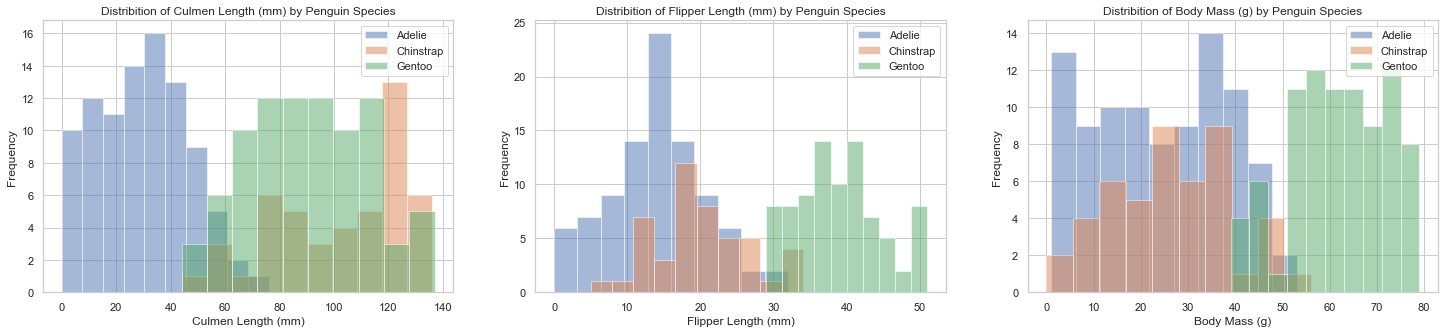

In [ ]:
cols = ['Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

fig, ax = plt.subplots(1,len(cols), figsize = (25,5)) #Initialize plot


def plot_hist(train, cols, alpha): 
  '''
  This function iterates through a list of chosen variables and plots 
  histograms for each of these variables based on the different penguin species.
  '''
  for i in range(len(cols)):
    ax[i].hist(train[cols[i]], alpha = alpha) #Plot histogram
    ax[i].set(title = "Distribition of " + cols[i] + " by Penguin Species")
    ax[i].set(ylabel = "Frequency")
    ax[i].set(xlabel = cols[i])

    #Create legend
    labels = ["Adelie", "Chinstrap", "Gentoo"]
    ax[i].legend(labels)


#Use groubpy to plot histograms for each species
train.groupby("Species").apply(plot_hist, cols, 0.5)

In the culmen length histogram, we see that Adelie penguins are on the lower end of the distribution while gentoo and chinstrap penguins are higher up. The adelie penguin distribution is skewed to the left, the chinstrap distribution is skewed to the right, and the gentoo distribution is almost symmetrical. 

In the flipper length histogram, we see that adelie penguins make up the mimimum flipper length, while gentoo penguins make up the maximum length. All of the distributions are relatively symmetrical. An interesting thing to note here is that there is a high prevalence of adelie penguins with a length of around 12 mm. 

In the body mass histogram,, we also see distributions that are approximately symmetrical for each penguin species. Chinstrap and adelie penguins make up the lower end of the spectrum, while the maximum penguin masses exclusively consist of gentoo penguins. Gentoo penguins seem to be the most physically imposing penguin species from these physical features.

## Feature Selection

In our exploratory analysis, we use a correlation heatmap to filter variables that we believe are important, which are Culmen Length, Flipper Length, Body Mass, and Island. In this section, we are going to use **random forest classification to help validate our choice of features**. In general, feature selection using Random forest gives a good predictive performance, low overfitting, and easy interpretability. Basically, we compute how much each variable is contributing to the decision and calculate their feature importance.


/Users/zhushenghua/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


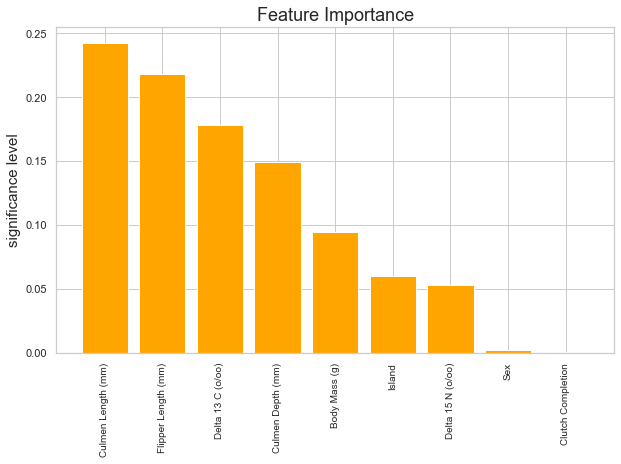

In [ ]:
features  = ['Island','Culmen Length (mm)','Clutch Completion','Culmen Depth (mm)',
              'Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

order=[]
for x in range(X_train.shape[1]):
    order.append(features[indices[x]])

plt.figure(figsize=(10,6))
plt.title("Feature Importance",fontsize = 18)
plt.ylabel("significance level",fontsize = 15,rotation=90)
for i in range(len(features)):
    plt.bar(i,importances[indices[i]],color='orange',align='center')
    plt.xticks(np.array([*range(len(features))]),order,rotation=90,fontsize=10)
plt.show()

In the feature importance plot, we sort the variables in terms of their feature importance in descending order. The two quantitative features with the greatest importance are Culmen Length and Flipper Length, and the qualitative feature with the greatest importance is Island. This result agrees with what we obtained from the correlation heatmap. Therefore, for our feature selection, we'll use **Culmen Length, Flipper Length, and Island**.

## Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import LinearSegmentedColormap
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [ ]:
#Subset the wanted predictor variables from the X_train dataset
Features = ['Culmen Length (mm)','Flipper Length (mm)','Island']
X_train_new = X_train[Features]
X_test_new = X_test[Features]
#Note: Data has already been cleaned so no need to clean again

#Keep track of the categorical variables
#0: Adelie Penguin
#1: Chinstrap penguin
#2: Gentoo penguin

#0: Biscoe
#1: Dream
#2: Torgersen

In [ ]:
list(set(penguins['Island']))

['Biscoe', 'Dream', 'Torgersen']

In [ ]:
def plot_decision_boundary(model):
    qualitative_fts_names = list(set(penguins['Island']))
    qualitative_fts_names.sort()
    qualitative_fts = list(set(X['Island']))
    species_names = ['Adelie','Chinstrap','Gentoo']
    species_col = ['red','green','blue']
    masks = []
    for i in range(len(qualitative_fts)):
        masks.append(X['Island'] == qualitative_fts[i])

    for i in range(len(masks)):
        xi = X[masks[i]]
        x0 = xi[Features[0]]
        x1 = xi[Features[1]]
        yi = y['Species'][masks[i]]
        grid_x = np.linspace(x0.min(),x0.max(),501)
        grid_y = np.linspace(x1.min(),x1.max(),501)
        z = qualitative_fts[i]*np.ones(501*501)
        xx,yy = np.meshgrid(grid_x,grid_y)

        XX = xx.ravel()
        YY = yy.ravel()
        ZZ = z.ravel()

        p = model.predict(pd.DataFrame(np.c_[XX,YY,ZZ],columns=Features))
        p_values = list(set(p))
        yi_values = list(set(yi))
        color_list_region = []
        color_list_scatter = []
        for j in range(len(p_values)): 
            color_list_region.append(species_col[p_values[j]])
        for k in range(len(yi_values)): 
            color_list_scatter.append(species_col[yi_values[k]])

        self_cmap_region = LinearSegmentedColormap.from_list('mycmap',color_list_region)
        self_cmap_scatter = LinearSegmentedColormap.from_list('mycmap',color_list_scatter)

        p=p.reshape(xx.shape)

        fig,ax = plt.subplots(1)

        ax.contourf(xx,yy,p,cmap=self_cmap_region,alpha=.2)

        for s in range(len(yi_values)): 
            maskl = yi==yi_values[s]
            ax.scatter(x0[maskl], x1[maskl], color=species_col[yi_values[s]], label=species_names[yi_values[s]])
            #set the title and label our axis
            ax.set(title="Island"+': '+ qualitative_fts_names[i])
            ax.set(xlabel = Features[0], ylabel = Features[1])
            ax.legend()

**MODEL 1: Logistic Regression**

Now we are going to construct a machine learning model to try and judge how accurate each predictor variable is in predicting the species of the penguin. Below we will implement a logistic regression model in order to discern if there is a relationship between each of the variables with the encoded species values. We extracted the two top quantitative variables from the feature selection bar graph above along with the top qualititative variable to use as predictor variables. 

In [ ]:
np.random.seed(1234)

#Now perform cross validation testing

# 10-fold cross validation: hold out 10%, train on the 90%, repeat 10 times. 
#Output accuracy scores for each 10-fold cross validation
#cv_scores = cross_val_score(train_model, X_train, y_train, cv=10)


c_values = np.linspace(0.1,5, num = 50)

best_mean = 0
best_c = 0
best_model = LogisticRegression(C = 0.1).fit(X_train_new, y_train)

for c in c_values:
    warnings.filterwarnings("ignore")
    model = LogisticRegression(C = c).fit(X_train_new, y_train)
    
    cv_score = cross_val_score(model, X_train_new, y_train, cv = 10).mean()
    
    if  cv_score >= best_mean:
        best_mean = cv_score
        best_c = c
        best_model = model


predictions = best_model.predict(X_test_new)
training_score = round(best_model.score(X_train_new, y_train), 2)
score = round(best_model.score(X_test_new, y_test), 2)
print('Test Score Accuracy: %.3f'% score)
print("Training Score Accuracy = " + str(training_score))

/Users/zhushenghua/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zhushenghua/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Score Accuracy: 0.730
Training Score Accuracy = 0.98


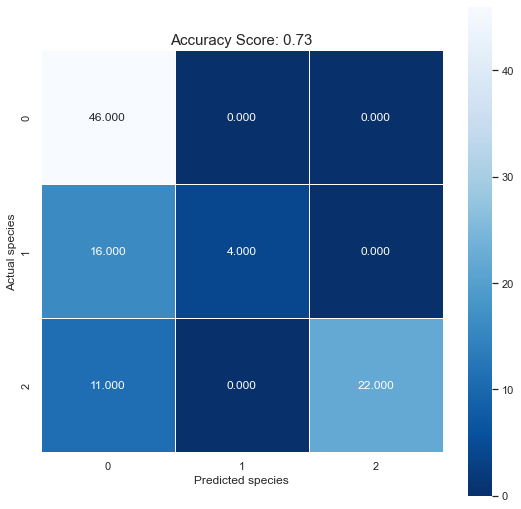

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Function to plot confusion matrices for different models
def cm_generator(cm, score):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual species');
    plt.xlabel('Predicted species');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15); 


cm = confusion_matrix(y_test, predictions, labels = [0, 1, 2])

cm_generator(cm, score)

This mean accuracy score gives us an overall picture of how well we can expect the regression model we developed to perform against actual test data. We used a k-value of 10 (data split into ten groups) as this is the value that generally limits bias between the training and test data. We then iterated over a different complexity parameter and chose the best logistic regression model - which corresponded with the model that contained the best mean cross validation scores from the different folds. 

We used this model to predict the test results and compared them to the actual test results we split from the data. **The confusion matrix above indicates how accurate our model was in predicting the species based on the variables we chose.** The values on the diagonal correspond with matrix values (i,j) where i = j. So for instance, the model accurately predicted 46 penguins in the test set to be Adelie penguins (species 0). The numbers off the diagonal correspond to the number of species the model predicted incorrectly. For example, the number incorrectly predicted 16 Adelie penguins when these penguins were actually Chinstrap penguins. As a result, the model was only **72% accurate**. 


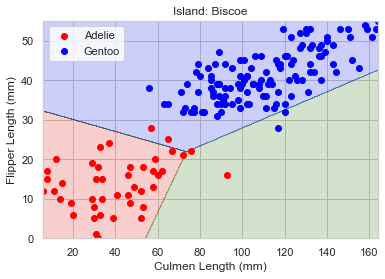

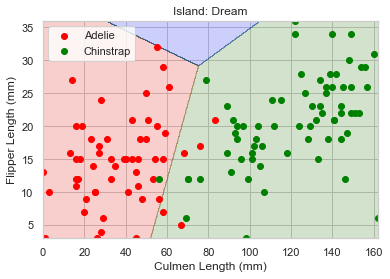

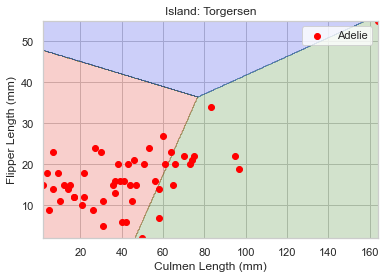

In [ ]:
plot_decision_boundary(best_model)

This decision boundary plot allows us to visualize how this logistic regression model arrived at its predictions. Correct predictions of the model are identified with points that match up in the zone that corresponds with the same color. For instance, the model correctly predicted Adelie penguins if the red points corresponding to Adelie penguins matched up to the red zone in the plot. Overall, the model generally predicted the correct penguin species, although it predicted 38 chinstrap and gentoo penguins as adelie penguins perhaps due to its prevalence on every island. Perhaps the machine learning model is equally weighing the importance of the categorical variable of island to the two quantitative variables of flipper Length and culmen Length, although our feature selection shows that flipper length and culmen length should have more influence in determining the penguin species. If the island is given equal weight, then it would have more influence than we expect it to, hence the over-prediction of other penguin species as adelie penguins.

**MODEL 2: Random Forest**

In [ ]:
#Now perform cross validation testing

# 10-fold cross validation: hold out 10%, train on the 90%, repeat 10 times. 
#Output accuracy scores for each 10-fold cross validation
np.random.seed(123)
best_cv_score = 0
scores=np.zeros(30)
for i in range (1, 30+1):
    clf = RandomForestClassifier(n_estimators = i)
    scores[i-1] = cross_val_score(clf, X_train_new, y_train, cv = 10).mean() #Update the scores if needed
    if scores[i-1] > best_cv_score:
        best_n_estimator = i
        best_cv_score = scores[i-1]
        clf_best = clf.fit(X_train_new, y_train)
        best_testing_score = clf.score(X_test_new, y_test)
y_pred = clf_best.predict(X_test_new)
print("Best n_estimators: " + str(best_n_estimator))
print("Best Training Score: " + str(round(best_cv_score,2)))
print("Best Testing score: " + str(round(best_testing_score, 2)))

Best n_estimators: 10
Best Training Score: 0.98
Best Testing score: 0.72


In [ ]:
#create confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[46  0  0]
 [14  6  0]
 [14  0 19]]


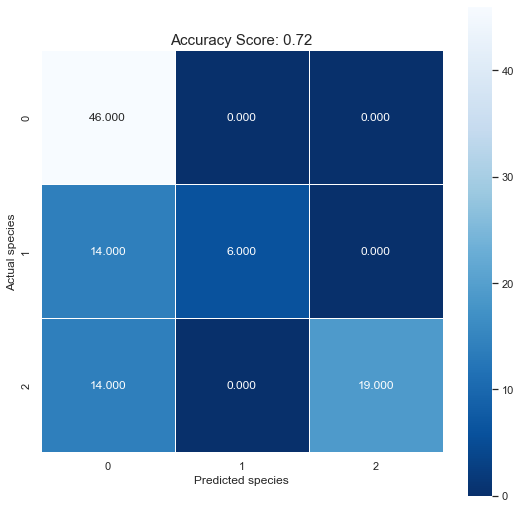

In [ ]:
#Visual Display of confusion matrix
cm_generator(cm2, round(best_testing_score,2))

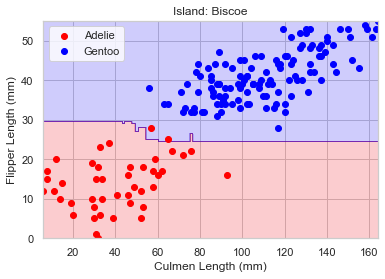

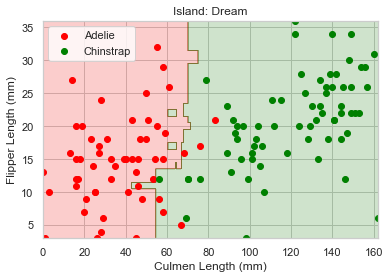

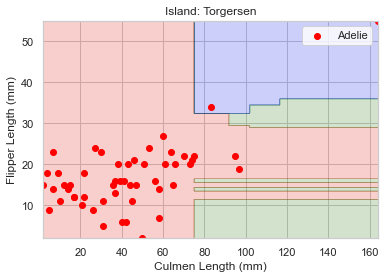

In [ ]:
plot_decision_boundary(clf_best)

This decision boundary plot allows us to visualize how the random forest model classified the data. Similar to the previous decision boundary plot, correct predictions are indicated with points matching the color of the region. This model was most accurate for classification of penguins on the Biscoe Island, as it only misclassified one Adelie penguin as Gentoo. The model was far less accurate for the Dream island. It correctly predicted all of the Chinstrap penguins on this island, but misclassified 8 of the Adelie penguins as Chinstrap. For Torgersen Island, the model similarly misclassified 2 Adelie penguins as Chinstrap. Overall, the model made very few classification mistakes outside of the Adelie penguins.

**MODEL 3: K-Nearest Neighbors**

In [ ]:
# 10-fold cross validation: hold out 10%, train on the 90%, repeat 10 times. 
#Output accuracy scores for each 10-fold cross validation
np.random.seed(123)
best_score = 0
for n in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors = n) #define the KNN model with current n
    cv_score = cross_val_score(KNN, X_train_new, y_train, cv = 10).mean() #calculate cv score
    #update the parameter and score if necessary 
    if cv_score > best_score:
        best_param = n
        best_score = cv_score
print("Best number of neighbors: ", best_param)
print("Best training score: ", round(best_score, 2))

Best number of neighbors:  3
Best training score:  0.95


In [ ]:
KNN_best = KNeighborsClassifier(n_neighbors = 3) 
KNN_best.fit(X_train_new, y_train)
y_pred = KNN_best.predict(X_test_new)
acc_score = KNN_best.score(X_test_new, y_test)
print("Testing score: ", round(acc_score,2))

Testing score:  0.68


In [ ]:
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

[[46  0  0]
 [17  3  0]
 [15  0 18]]


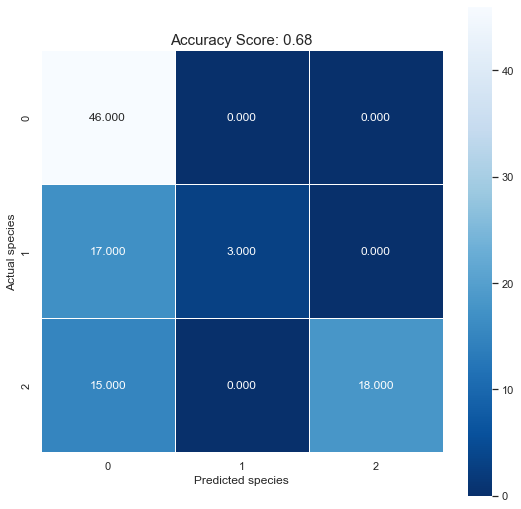

In [ ]:
#Visual Display of confusion matrix
cm_generator(cm3, round(acc_score,2))

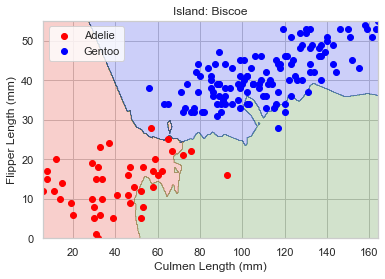

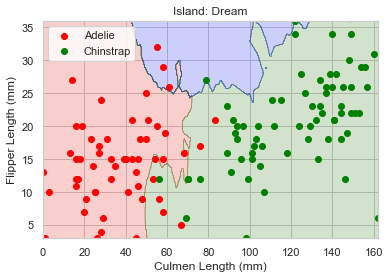

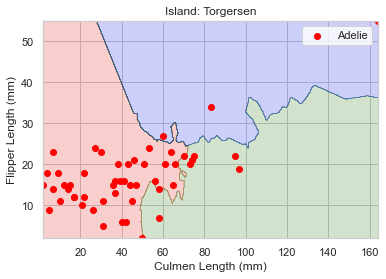

In [ ]:
plot_decision_boundary(KNN_best)

This decision boundary plot allows us to visualize how the K-nearest model classified the data. This plot shows a major difference between this model and the other two, as there was a classification region for each of the species on every Island. On Biscoe Island, some of the Adelie and Gentoo penguins were misclassified as Chinstrap, even though there were no Chinstrap penguins on the island. Only one other mistake was made in the model, as an Adelie penguin was classified incorrectly as Gentoo. On Dream Island, the model misclassified several penguins as Gentoo, although no Gentoo penguins were on this island. Aside from this, the model misclassified 6 Adelie penguins as Chinstrap. On Torgersen Island, a few Adelie penguins were classified as Chinstrap and Gentoo penguins. In reality, this island only consisted of Adelie penguins.

## Final Discussion:
We decided to choose the **Random Forest Classification model** due to its high accuracy score and its versatility. The accuracy score for the random forest model was **72%**, while the scores for our logistic regression and KNN models were 73% and 68% respectively. Although logistic regression has a slightly higher accuracy score, it really only works best on binary classification features, which we did not have. The reason for their relatively poor performance can be attributed to our feature selection. With hindsight, it may have been better to include **the sex** of the penguins as our categorical variable rather than the island, as the influence of the Island variable may have been responsible for some of the classification error we saw in our machine learning model. The model could be improved by including Sex as one of our features in our model. 